In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DF basic").getOrCreate()

In [2]:
#Standard
orders_df = spark.read \
.format("csv") \
.option("header", "true") \
.option("inferSchema", "true") \
.load("D:\GKD\SPARK_HDFS\data_etc\data_inferSchema.csv")



In [24]:
orders_df.show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [25]:
# data type
orders_df.printSchema()

root
 |-- OrderID: integer (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- OrderStatus: string (nullable = true)



In [26]:
from pyspark.sql.functions import *

In [27]:
# đổi kiểu dữ liểu
orders_df1 = orders_df.withColumn("id_cusNEW", col("CustomerID").cast("string"))

In [28]:
orders_df1.printSchema()

root
 |-- OrderID: integer (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- OrderStatus: string (nullable = true)
 |-- id_cusNEW: string (nullable = true)



In [29]:
orders_df1.show(5)

+-------+-------------------+----------+---------------+---------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|id_cusNEW|
+-------+-------------------+----------+---------------+---------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|    11599|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|      256|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|    12111|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|     8827|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|    11318|
+-------+-------------------+----------+---------------+---------+
only showing top 5 rows



In [30]:
orders_df2 = orders_df1.withColumnRenamed("OrderStatus","Status") # đổi tên cột OrderStatus thành Statusss
orders_df2.show(5)

+-------+-------------------+----------+---------------+---------+
|OrderID|          OrderDate|CustomerID|         Status|id_cusNEW|
+-------+-------------------+----------+---------------+---------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|    11599|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|      256|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|    12111|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|     8827|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|    11318|
+-------+-------------------+----------+---------------+---------+
only showing top 5 rows



In [31]:
final_df = orders_df2.select("OrderID","Status")
final_df.show(5)

+-------+---------------+
|OrderID|         Status|
+-------+---------------+
|      1|         CLOSED|
|      2|PENDING_PAYMENT|
|      3|       COMPLETE|
|      4|         CLOSED|
|      5|       COMPLETE|
+-------+---------------+
only showing top 5 rows



In [32]:
final_df1 = orders_df2.drop("OrderDate","CustomerID","id_cusNEW")
final_df1.show(5)

+-------+---------------+
|OrderID|         Status|
+-------+---------------+
|      1|         CLOSED|
|      2|PENDING_PAYMENT|
|      3|       COMPLETE|
|      4|         CLOSED|
|      5|       COMPLETE|
+-------+---------------+
only showing top 5 rows



In [34]:
final_df1.write.csv("D:\GKD\SPARK_HDFS\data_select.csv") #để lưu lại

# spark read

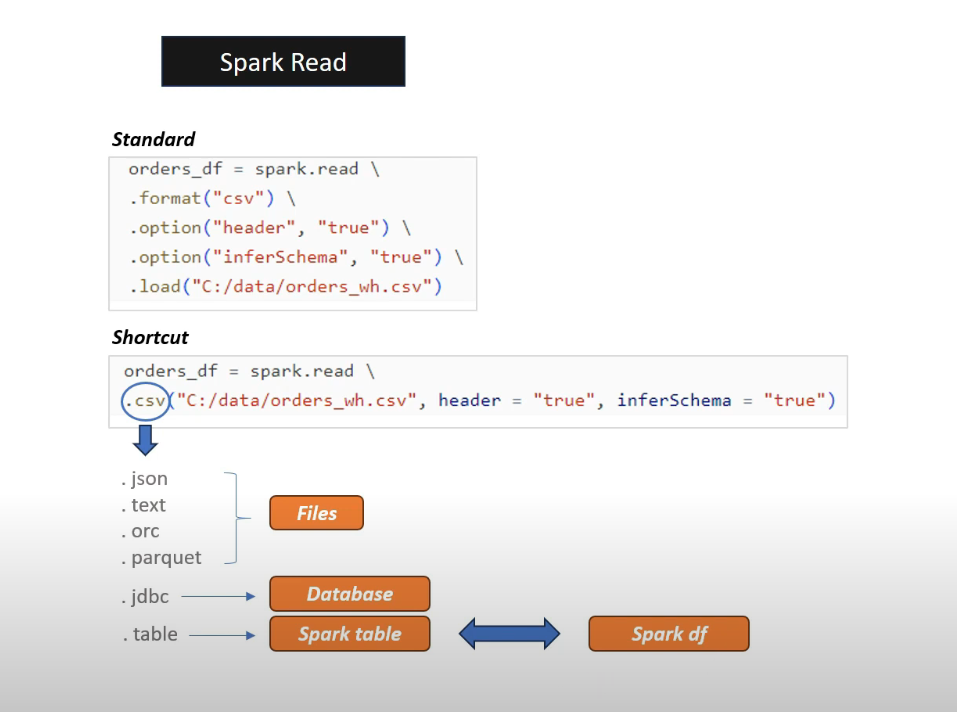

In [ ]:
#Standard
orders_df = spark.read \
.format("csv") \
.option("header", "true") \
.option("inferSchema", "true") \
.load("D:\GKD\SPARK_HDFS\data_etc\data_inferSchema.csv")

# hoặc kiểu này cũng được 
# orders_df2 = spark.read.csv("D:\GKD\SPARK_HDFS\data_etc\data_inferSchema.csv", header = "true", inferSchema = "true")

In [3]:
orders_df.show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [7]:
# từ dataframe chuyển sang spark table
orders_df.createOrReplaceGlobalTempView("orders")

In [9]:
# tạo lại thành data frame
df = spark.sql("select * from global_temp.orders")


In [10]:
df.show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



# spark SQL
##  managed table vs external table

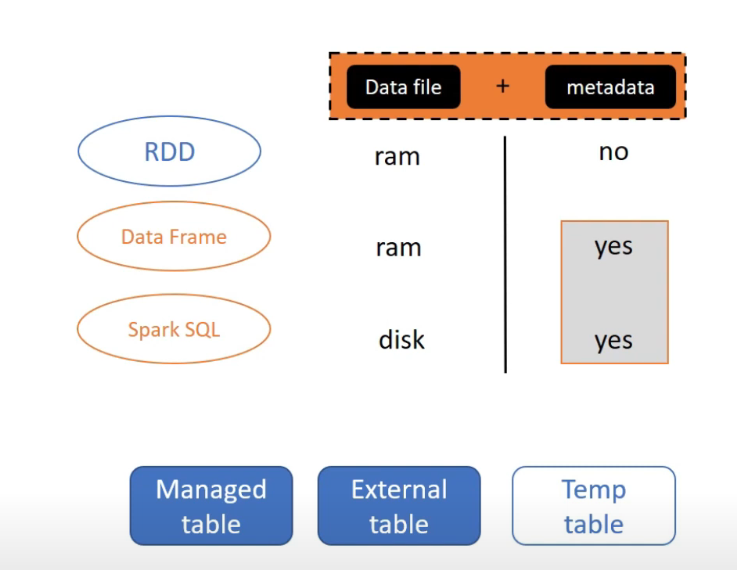

In [4]:
from pyspark.sql import SparkSession
# tạo sparkSession
spark = SparkSession. \
builder. \
config("spark.sql.warehouse.dir", "D:\GKD\SPARK_HDFS\spark-warehouse"). \
enableHiveSupport(). \
getOrCreate()

In [6]:
orders_df = spark.read.csv("D:\GKD\SPARK_HDFS\data_etc\data_inferSchema.csv", header = "true", inferSchema = "true")

In [31]:
# tạo một bảng tạm 
orders_df.createOrReplaceTempView("order_tmp")

In [32]:
spark.sql("select * from order_tmp")

DataFrame[OrderID: int, OrderDate: timestamp, CustomerID: int, OrderStatus: string]

In [33]:
spark.sql("select * from order_tmp").show(5)
#cái bảng tạm là cầu nối giữa DataFrame và spark sql

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



### managed table

In [34]:
# Create a database if it does not exist
spark.sql("CREATE DATABASE IF NOT EXISTS spark_sql_database")

# List all databases
spark.sql("SHOW DATABASES").show()


+------------------+
|         namespace|
+------------------+
|           default|
|           s_sql_1|
|    spark_database|
|spark_sql_database|
+------------------+



In [37]:
# Create the database if it doesn't exist
spark.sql("CREATE DATABASE IF NOT EXISTS spark_sql_database")

# Write the DataFrame to a managed table
orders_df.write.mode("overwrite").saveAsTable("spark_sql_database.orders_managed")


In [38]:
spark.sql("show tables in spark_sql_database").show()

+------------------+--------------+-----------+
|         namespace|     tableName|isTemporary|
+------------------+--------------+-----------+
|spark_sql_database|orders_managed|      false|
|                  |     order_tmp|       true|
+------------------+--------------+-----------+



In [39]:
spark.sql("select * from spark_sql_database.orders_managed").show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [40]:
spark.sql("describe extended spark_sql_database.orders_managed").show(30, False)

+----------------------------+----------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                   |comment|
+----------------------------+----------------------------------------------------------------------------+-------+
|OrderID                     |int                                                                         |NULL   |
|OrderDate                   |timestamp                                                                   |NULL   |
|CustomerID                  |int                                                                         |NULL   |
|OrderStatus                 |string                                                                      |NULL   |
|                            |                                                                            |       |
|# Detailed Table Information|                                          

#### external table

In [ ]:
spark.sql("""
CREATE EXTERNAL TABLE IF NOT EXISTS spark_sql_database.orders_external (
    OrderID INT,
    OrderDate STRING,
    CustomerID INT,
    OrderStatus STRING
) 
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LOCATION 'file:/D:/GKD/SPARK_HDFS/hive/spark-warehouse/spark_sql_database.db/orders_managed'
""")


In [47]:
#create external table with file csv
spark. sql("""create table spark_sql_database.orders_ext2
(OrderID integer, OrderDate string, CustomerID integer, OrderStatus string)
using csv options (path 'D:/GKD/SPARK_HDFS/data_etc/data_inferSchema.csv')""")

DataFrame[]

In [48]:
spark.sql("show tables in spark_sql_database").show()

+------------------+--------------+-----------+
|         namespace|     tableName|isTemporary|
+------------------+--------------+-----------+
|spark_sql_database|   orders_ext2|      false|
|spark_sql_database|orders_managed|      false|
|                  |     order_tmp|       true|
+------------------+--------------+-----------+



In [49]:
spark.sql("describe extended spark_sql_database.orders_ext2").show(30, False)

+----------------------------+-------------------------------------------------------+-------+
|col_name                    |data_type                                              |comment|
+----------------------------+-------------------------------------------------------+-------+
|OrderID                     |int                                                    |NULL   |
|OrderDate                   |string                                                 |NULL   |
|CustomerID                  |int                                                    |NULL   |
|OrderStatus                 |string                                                 |NULL   |
|                            |                                                       |       |
|# Detailed Table Information|                                                       |       |
|Catalog                     |spark_catalog                                          |       |
|Database                    |spark_sql_database  

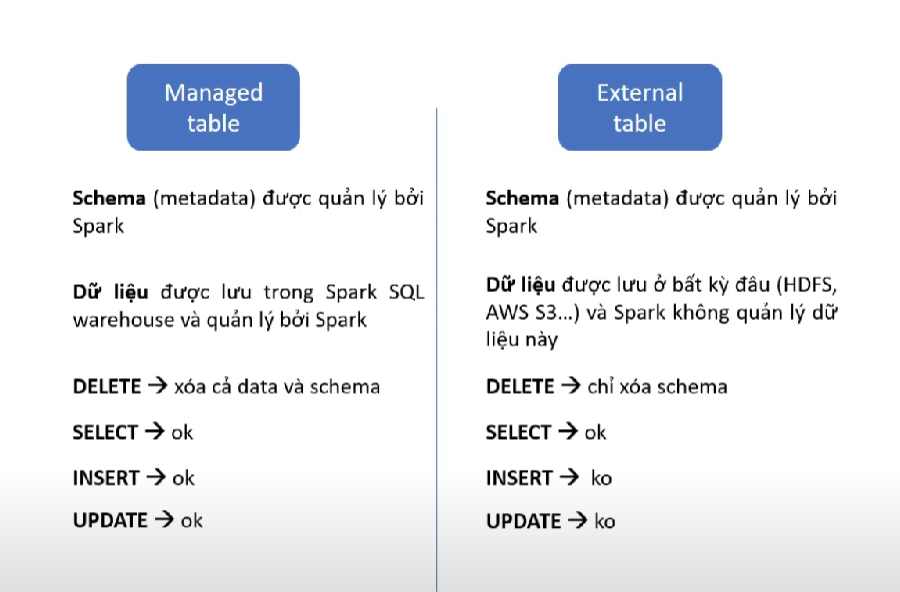

# Bài tập thực hành DataFrame - Phần 2
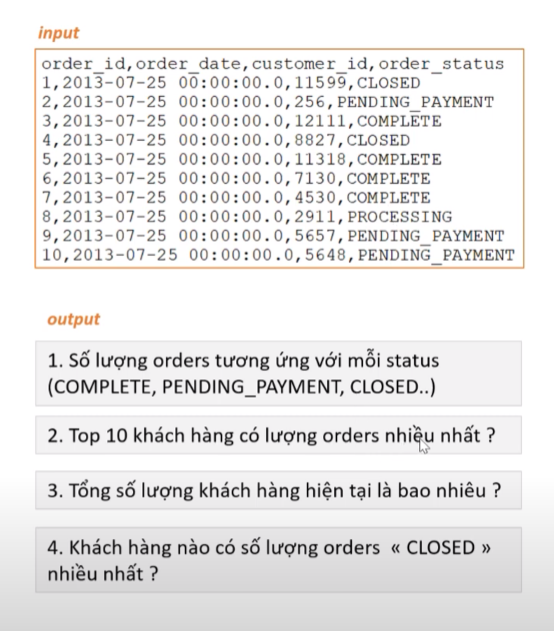

In [1]:
from pyspark.sql import SparkSession
# tạo sparkSession
spark = SparkSession. \
builder. \
appName('Bài tập thực hành DataFrame - Phần 2'). \
config("spark.sql.warehouse.dir", "D:\GKD\SPARK_HDFS\spark-warehouse"). \
enableHiveSupport(). \
getOrCreate()

In [2]:
orders_df = spark.read.csv("D:\GKD\SPARK_HDFS\data_etc\data_inferSchema.csv", header=True, inferSchema=True) #inferSchema cho tự định nghĩa cấu trúc dữ liệu


In [3]:
orders_df.show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [10]:
# do có dùng spark sql nên tạp thêm một bản tạm từ orders_df
# Tạo view tạm từ DataFrame
orders_df.createOrReplaceTempView("orders_tmp")

# Truy vấn dữ liệu từ view tạm
spark.sql("SELECT * FROM orders_tmp").show(5)


+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [11]:
# làm với df trước
orders_df.groupBy("OrderStatus").count().show()

+---------------+-----+
|    OrderStatus|count|
+---------------+-----+
|PENDING_PAYMENT|    6|
|       COMPLETE|    5|
|     PROCESSING|    2|
|         CLOSED|    2|
+---------------+-----+



In [12]:
# làm với spark sql
spark.sql("SELECT OrderStatus,COUNT(*) FROM orders_tmp GROUP BY OrderStatus").show()

+---------------+--------+
|    OrderStatus|count(1)|
+---------------+--------+
|PENDING_PAYMENT|       6|
|       COMPLETE|       5|
|     PROCESSING|       2|
|         CLOSED|       2|
+---------------+--------+



In [18]:
# tìm khách hành order nhiều nhất (10 khách hàng)
# làm với df trước
top10order= orders_df.groupBy("CustomerID").count().sort("count", ascending=False).limit(10)
top10order.show()

+----------+-----+
|CustomerID|count|
+----------+-----+
|      5657|    3|
|      4530|    2|
|      2911|    2|
|      5648|    2|
|      8827|    1|
|      7130|    1|
|     12111|    1|
|     11318|    1|
|       256|    1|
|     11599|    1|
+----------+-----+



In [24]:
# tìm khách hành order nhiều nhất (10 khách hàng)
# làm với spark sql
spark.sql("SELECT CustomerID,COUNT(*) as xep FROM orders_tmp GROUP BY CustomerID ORDER BY xep DESC LIMIT 10").show()

+----------+---+
|CustomerID|xep|
+----------+---+
|      5657|  3|
|      4530|  2|
|      2911|  2|
|      5648|  2|
|      8827|  1|
|      7130|  1|
|     12111|  1|
|     11318|  1|
|       256|  1|
|     11599|  1|
+----------+---+



In [27]:
#đếm số lượng customer là bao nhiêu
# làm với df trước
orders_df.select("CustomerID").distinct().count()

10

In [33]:
#đếm số lượng customer là bao nhiêu
# làm với spark sql
spark.sql("SELECT COUNT(distinct CustomerID) as nb_customer FROM orders_tmp").show()

+-----------+
|nb_customer|
+-----------+
|         10|
+-----------+



In [39]:
# tìm khách hàng có số lượng order CLOSED
# làm với df trước
orders_df.where("OrderStatus = 'CLOSED'").groupBy("CustomerID").count().sort("count", ascending=False).show()

+----------+-----+
|CustomerID|count|
+----------+-----+
|      8827|    1|
|     11599|    1|
+----------+-----+



In [57]:
# tìm khách hàng có số lượng order CLOSED
# làm với spark sql
spark.sql("SELECT CustomerID, count(OrderStatus) as dem FROM orders_tmp where OrderStatus = 'CLOSED' GROUP BY CustomerID ORDER BY dem DESC").show()

+----------+---+
|CustomerID|dem|
+----------+---+
|      8827|  1|
|     11599|  1|
+----------+---+



# 7 cách tạo DataFrame trong Spark
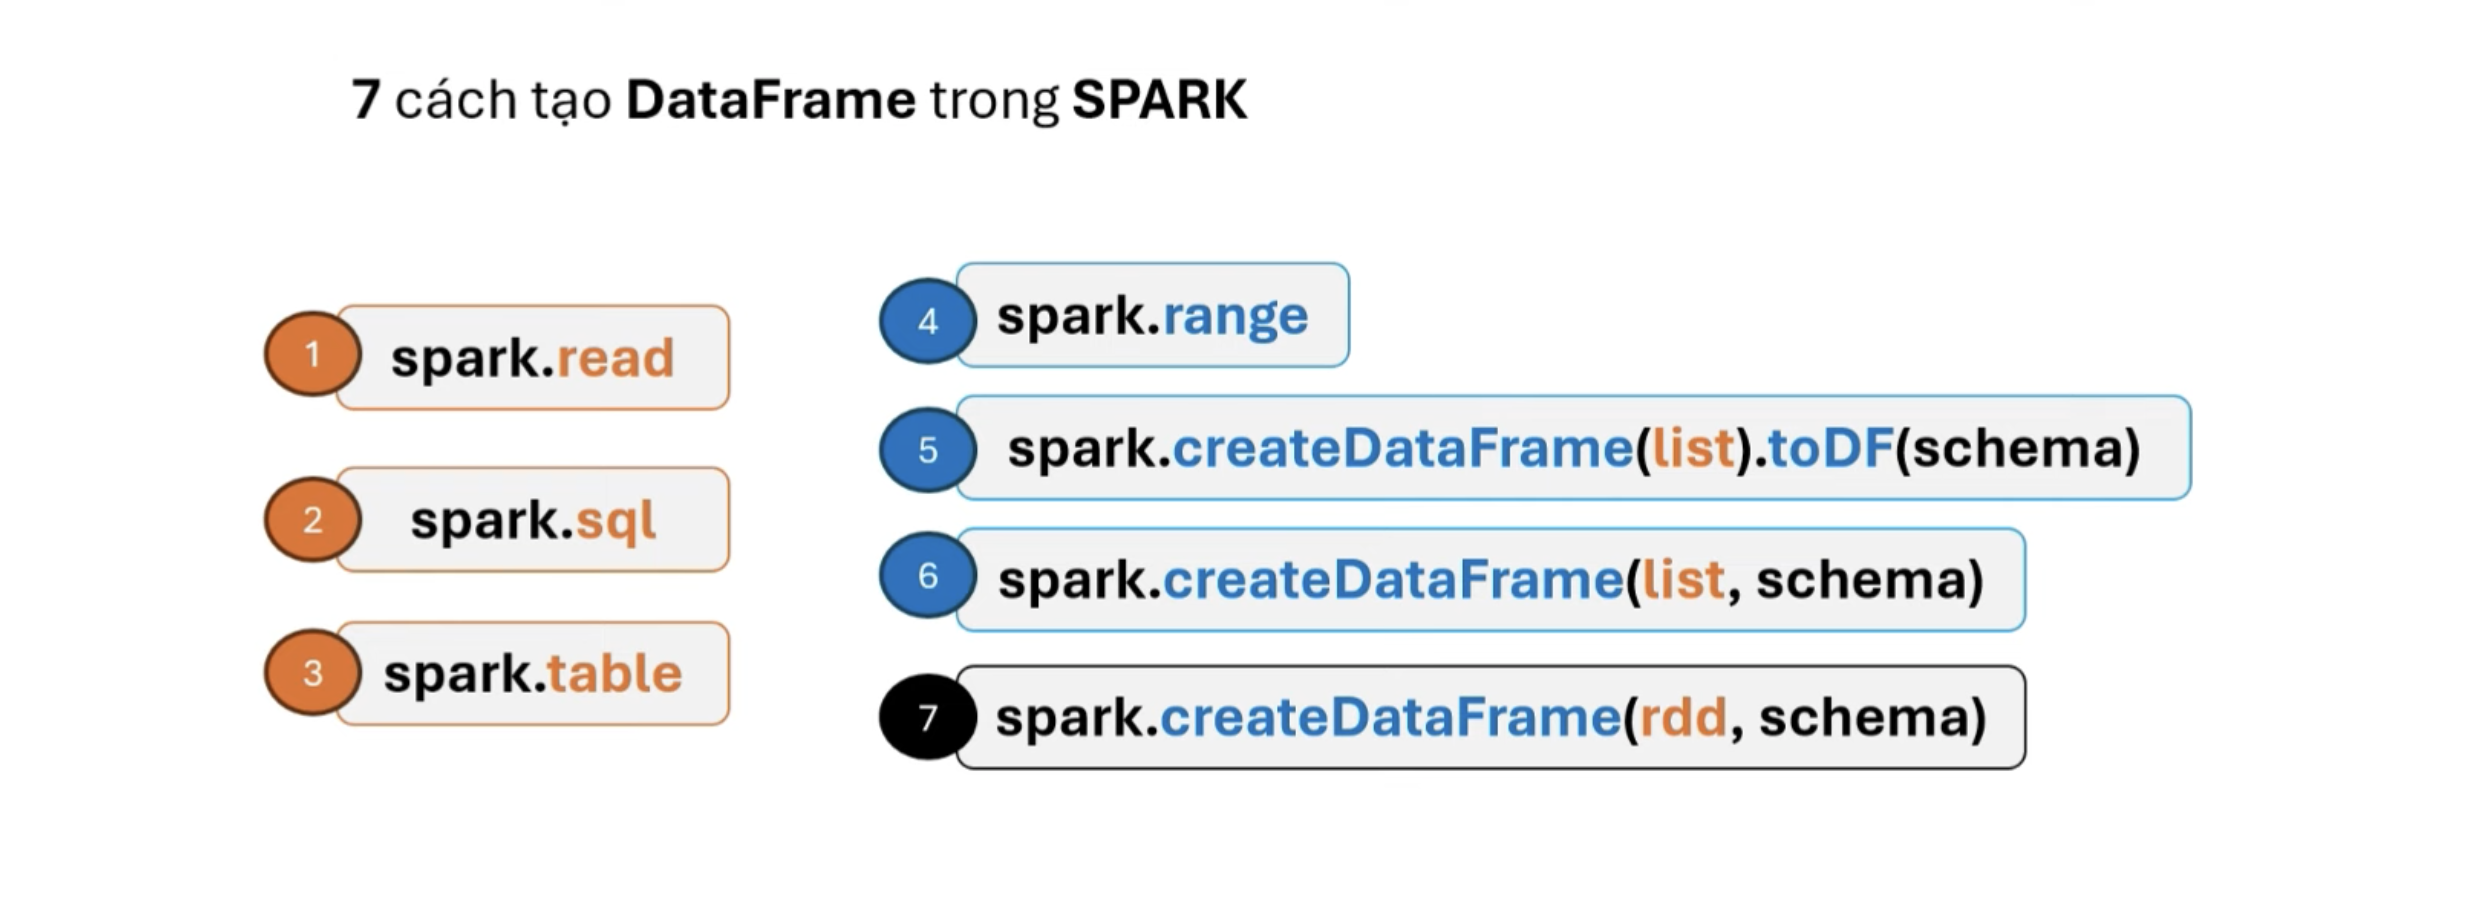

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("7 way to create a df").getOrCreate()

df1 = spark.read \
.format("csv") \
.option("header", "true") \
.option("inferSchema", "true") \
.load("D:\GKD\SPARK_HDFS\data_etc\data_inferSchema.csv")

In [5]:
df1.show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [10]:
# tạo  bản tạm
df1.createOrReplaceTempView("orders")
# Truy vấn dữ liệu từ view tạm
spark.sql("SELECT * FROM orders").show(5)


+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [13]:
df2 = spark.table("orders")
df2.show(5)

+-------+-------------------+----------+---------------+
|OrderID|          OrderDate|CustomerID|    OrderStatus|
+-------+-------------------+----------+---------------+
|      1|2013-07-25 00:00:00|     11599|         CLOSED|
|      2|2013-07-25 00:00:00|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:00|     12111|       COMPLETE|
|      4|2013-07-25 00:00:00|      8827|         CLOSED|
|      5|2013-07-25 00:00:00|     11318|       COMPLETE|
+-------+-------------------+----------+---------------+
only showing top 5 rows



In [15]:
df4 = spark.range(1,6) #start, end, step
df4.show()

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+



In [16]:
list_order = [(1,'2013-07-25',11599,'CLOSED'),(2,'2013-07-25',256,'PENDING_PAYMENT'),(3,'2013-07-25',12111,'COMPLETE')]
df5 = spark.createDataFrame(list_order)
df5.show(5)

+---+----------+-----+---------------+
| _1|        _2|   _3|             _4|
+---+----------+-----+---------------+
|  1|2013-07-25|11599|         CLOSED|
|  2|2013-07-25|  256|PENDING_PAYMENT|
|  3|2013-07-25|12111|       COMPLETE|
+---+----------+-----+---------------+



In [17]:
df5.printSchema()

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)
 |-- _4: string (nullable = true)



In [19]:
df5 = df5.toDF('OrderID', 'OrderDate', 'CustomerID', 'OrderStatus') # tạo tên cột cho df5 bằng toDF
df5.show()

+-------+----------+----------+---------------+
|OrderID| OrderDate|CustomerID|    OrderStatus|
+-------+----------+----------+---------------+
|      1|2013-07-25|     11599|         CLOSED|
|      2|2013-07-25|       256|PENDING_PAYMENT|
|      3|2013-07-25|     12111|       COMPLETE|
+-------+----------+----------+---------------+



In [20]:
order_schema = ['OrderID', 'OrderDate', 'CustomerID', 'OrderStatus']
df6 = spark.createDataFrame(list_order,order_schema)
df6.show()

+-------+----------+----------+---------------+
|OrderID| OrderDate|CustomerID|    OrderStatus|
+-------+----------+----------+---------------+
|      1|2013-07-25|     11599|         CLOSED|
|      2|2013-07-25|       256|PENDING_PAYMENT|
|      3|2013-07-25|     12111|       COMPLETE|
+-------+----------+----------+---------------+



In [23]:
rdd = spark.sparkContext.textFile("D:\GKD\SPARK_HDFS\data_etc\data.csv")# spark thì k có schema(cấu trúc cơ sở dữ liệu,), tên cột
rdd.take(5)

['1,2013-07-25 00:00:00.0,11599,CLOSED',
 '2,2013-07-25 00:00:00.0,256,PENDING_PAYMENT',
 '3,2013-07-25 00:00:00.0,12111,COMPLETE',
 '4,2013-07-25 00:00:00.0,8827,CLOSED',
 '5,2013-07-25 00:00:00.0,11318,COMPLETE']

In [24]:
order_rdd = rdd.map(lambda x: (int(x.split(",")[0]),x.split(",")[1],int(x.split(",")[2]), x.split(",")[3]))

In [26]:
order_rdd.take(5)

[(1, '2013-07-25 00:00:00.0', 11599, 'CLOSED'),
 (2, '2013-07-25 00:00:00.0', 256, 'PENDING_PAYMENT'),
 (3, '2013-07-25 00:00:00.0', 12111, 'COMPLETE'),
 (4, '2013-07-25 00:00:00.0', 8827, 'CLOSED'),
 (5, '2013-07-25 00:00:00.0', 11318, 'COMPLETE')]

In [28]:
order_schema = ['OrderID', 'OrderDate', 'CustomerID', 'OrderStatus']
df7 = spark.createDataFrame(order_rdd,order_schema)
df7.show(5)

+-------+--------------------+----------+---------------+
|OrderID|           OrderDate|CustomerID|    OrderStatus|
+-------+--------------------+----------+---------------+
|      1|2013-07-25 00:00:...|     11599|         CLOSED|
|      2|2013-07-25 00:00:...|       256|PENDING_PAYMENT|
|      3|2013-07-25 00:00:...|     12111|       COMPLETE|
|      4|2013-07-25 00:00:...|      8827|         CLOSED|
|      5|2013-07-25 00:00:...|     11318|       COMPLETE|
+-------+--------------------+----------+---------------+
only showing top 5 rows



# Bài tập thực hành DataFrame - Phần 3
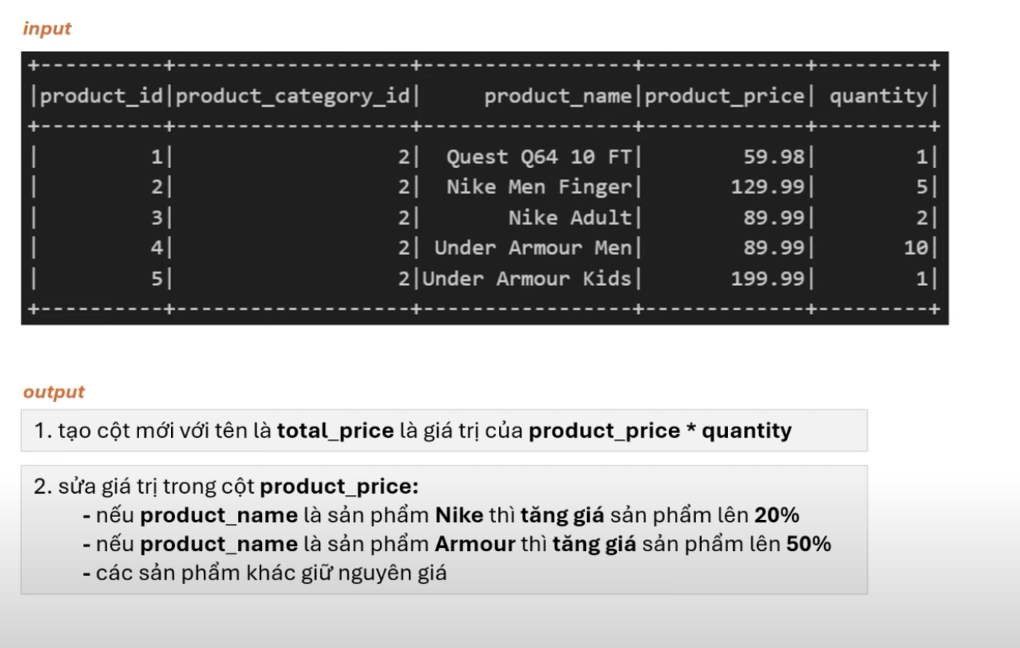

In [30]:
import pandas as pd

# Tạo một DataFrame mẫu
data = {
    'product_id': [1, 2, 3, 4, 5],
    'product_category_id': [2, 2, 2, 2, 2],
    'product_name': ['Quest Q64 10 FT', 'Nike Men Finger', 'Nike Adult', 'Under Armour Men', 'Under Armour Kids'],
    'product_price': [59.98, 129.99, 89.99, 89.99, 199.99],
    'quantity': [1, 5, 2, 10, 1]
}

# Tạo DataFrame gốc
df = pd.DataFrame(data)

# Lưu DataFrame vào file CSV (không sử dụng Styler)
df.to_csv("product.csv", index=False)  # index=False để không lưu cột index


In [31]:
df

,product_id,product_category_id,product_name,product_price,quantity
0,1,2,Quest Q64 10 FT,59.98,1
1,2,2,Nike Men Finger,129.99,5
2,3,2,Nike Adult,89.99,2
3,4,2,Under Armour Men,89.99,10
4,5,2,Under Armour Kids,199.99,1


In [7]:
from pyspark.sql import SparkSession

spark = SparkSession. \
builder. \
appName("Exo DF part 3"). \
getOrCreate()

In [32]:
product_df = spark.read \
.format("csv") \
.option("header", "true") \
.option("inferSchema", "true") \
.load("D:\GKD\SPARK_HDFS\data_etc\product.csv")

In [33]:
product_df.show()

+----------+-------------------+-----------------+-------------+--------+
|product_id|product_category_id|     product_name|product_price|quantity|
+----------+-------------------+-----------------+-------------+--------+
|         1|                  2|  Quest Q64 10 FT|        59.98|       1|
|         2|                  2|  Nike Men Finger|       129.99|       5|
|         3|                  2|       Nike Adult|        89.99|       2|
|         4|                  2| Under Armour Men|        89.99|      10|
|         5|                  2|Under Armour Kids|       199.99|       1|
+----------+-------------------+-----------------+-------------+--------+



In [36]:
from pyspark.sql.functions import*

In [37]:
# bài 1 tạo thêm cột giá
product_df.withColumn("total_price", col("product_price") * col("quantity")).show()

+----------+-------------------+-----------------+-------------+--------+-----------+
|product_id|product_category_id|     product_name|product_price|quantity|total_price|
+----------+-------------------+-----------------+-------------+--------+-----------+
|         1|                  2|  Quest Q64 10 FT|        59.98|       1|      59.98|
|         2|                  2|  Nike Men Finger|       129.99|       5|     649.95|
|         3|                  2|       Nike Adult|        89.99|       2|     179.98|
|         4|                  2| Under Armour Men|        89.99|      10|      899.9|
|         5|                  2|Under Armour Kids|       199.99|       1|     199.99|
+----------+-------------------+-----------------+-------------+--------+-----------+



In [40]:
product_df.selectExpr("*", ("product_price*quantity as total_price")).show()

+----------+-------------------+-----------------+-------------+--------+-----------+
|product_id|product_category_id|     product_name|product_price|quantity|total_price|
+----------+-------------------+-----------------+-------------+--------+-----------+
|         1|                  2|  Quest Q64 10 FT|        59.98|       1|      59.98|
|         2|                  2|  Nike Men Finger|       129.99|       5|     649.95|
|         3|                  2|       Nike Adult|        89.99|       2|     179.98|
|         4|                  2| Under Armour Men|        89.99|      10|      899.9|
|         5|                  2|Under Armour Kids|       199.99|       1|     199.99|
+----------+-------------------+-----------------+-------------+--------+-----------+



In [42]:
"""2. sửa giá trị trong cột product_price:
- nếu product_name là sản phẩm Nike thì tăng giá sản phẩm lên 20%
- nếu product_name là sản phẩm Armour thì tăng giá sản phẩm lên 50%
- các sản phẩm khác giữ nguyên giá"""

'2. sửa giá trị trong cột product_price:\n- nếu product_name là sản phẩm Nike thì tăng giá sản phẩm lên 20%\n- nếu product_name là sản phẩm Armour thì tăng giá sản phẩm lên 50%\n- các sản phẩm khác giữ nguyên giá'

In [43]:
# do có dùng spark sql nên tạp thêm một bản tạm từ orders_df
# Tạo view tạm từ DataFrame
product_df.createOrReplaceTempView("price_fix")

In [70]:
# Chạy truy vấn SQL với nhiều điều kiện trong CASE WHEN
spark.sql("""
    SELECT 
        product_id,
        product_category_id,
        product_name,
        product_price,
        quantity,
        CASE 
            WHEN product_name LIKE '%Nike%' THEN product_price * 1.2
            WHEN product_name LIKE '%Armour%' THEN product_price * 1.5
            ELSE product_price
        END AS price_fix
    FROM price_fix
""").show()


+----------+-------------------+-----------------+-------------+--------+------------------+
|product_id|product_category_id|     product_name|product_price|quantity|         price_fix|
+----------+-------------------+-----------------+-------------+--------+------------------+
|         1|                  2|  Quest Q64 10 FT|        59.98|       1|             59.98|
|         2|                  2|  Nike Men Finger|       129.99|       5|           155.988|
|         3|                  2|       Nike Adult|        89.99|       2|107.98799999999999|
|         4|                  2| Under Armour Men|        89.99|      10|134.98499999999999|
|         5|                  2|Under Armour Kids|       199.99|       1|           299.985|
+----------+-------------------+-----------------+-------------+--------+------------------+



In [57]:
product_df.withColumn("product_price",
                      when(col("product_name").contains("Nike"), col("product_price")*1.2)
                      .when(col("product_name").contains("Armour"), col("product_price")*1.5)
                      .otherwise(col("product_price"))).show()

+----------+-------------------+-----------------+------------------+--------+
|product_id|product_category_id|     product_name|     product_price|quantity|
+----------+-------------------+-----------------+------------------+--------+
|         1|                  2|  Quest Q64 10 FT|             59.98|       1|
|         2|                  2|  Nike Men Finger|           155.988|       5|
|         3|                  2|       Nike Adult|107.98799999999999|       2|
|         4|                  2| Under Armour Men|134.98499999999999|      10|
|         5|                  2|Under Armour Kids|           299.985|       1|
+----------+-------------------+-----------------+------------------+--------+

